In [ ]:
import os
import numpy as np
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving X.txt.npy to X.txt.npy


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Y.txt.npy to Y.txt.npy


In [ ]:
X = np.load('X.txt.npy')
Y = np.load('Y.txt.npy')

X = np.reshape(X, (X.shape[0],(X.shape[1]*X.shape[2]*X.shape[3])))
pca = PCA(n_components = 125)
X = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Best Parameters for SVM

In [ ]:
classifier = svm.SVC()

params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf = GridSearchCV(classifier, params)
clf.fit(X_train,y_train)
print("Best parameters for SVM: ",clf.best_params_)

Best parameters for SVM:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
classifier.set_params(**clf.best_params_)

classifier.fit(X_train, y_train) 
predict = classifier.predict(X_test)

[[14  5]
 [ 3  6]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.55      0.67      0.60         9

    accuracy                           0.71        28
   macro avg       0.68      0.70      0.69        28
weighted avg       0.73      0.71      0.72        28



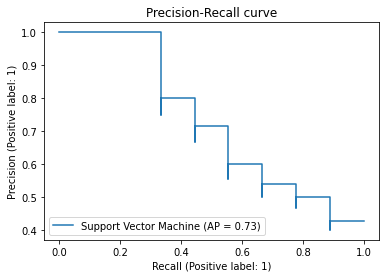

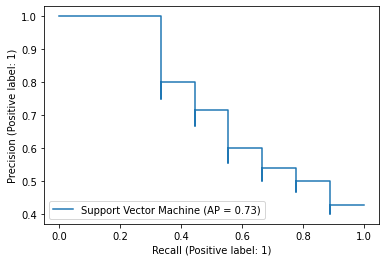

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name='Support Vector Machine')
_ = display.ax_.set_title("Precision-Recall curve")
display.plot()

# Best Parameters for KNN

In [ ]:
def KfoldCrossValidation(model):
    pipeline = make_pipeline(model)
    strtfdKFold = StratifiedKFold(n_splits=10)
    kfold = strtfdKFold.split(X_train, y_train)
    scores = []
    for k, (train, test) in enumerate(kfold):
        pipeline.fit(X_train[train, :], y_train[train])
        score = pipeline.score(X_train[test, :], y_train[test])
        scores.append(score)
        
        print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
    print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

In [ ]:
cls = KNeighborsClassifier()

params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
clf = GridSearchCV(cls, params)
clf.fit(X_train,y_train)
print("Best parameters for KNN: ",clf.best_params_)

Best parameters for KNN:  {'n_neighbors': 7}


In [ ]:
cls.set_params(**clf.best_params_)
KfoldCrossValidation(cls)

cls.fit(X_train, y_train)
predict = cls.predict(X_test)

Fold:  1, Training/Test Split Distribution: [55 44], Accuracy: 0.727
Fold:  2, Training/Test Split Distribution: [55 44], Accuracy: 0.364
Fold:  3, Training/Test Split Distribution: [55 44], Accuracy: 0.636
Fold:  4, Training/Test Split Distribution: [55 44], Accuracy: 0.545
Fold:  5, Training/Test Split Distribution: [55 44], Accuracy: 0.545
Fold:  6, Training/Test Split Distribution: [55 44], Accuracy: 0.818
Fold:  7, Training/Test Split Distribution: [55 44], Accuracy: 0.636
Fold:  8, Training/Test Split Distribution: [55 44], Accuracy: 0.818
Fold:  9, Training/Test Split Distribution: [55 44], Accuracy: 0.545
Fold: 10, Training/Test Split Distribution: [54 45], Accuracy: 0.455

Cross-Validation accuracy: 0.609 +/- 0.141


[[14  5]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.44      0.44      0.44         9

    accuracy                           0.64        28
   macro avg       0.59      0.59      0.59        28
weighted avg       0.64      0.64      0.64        28



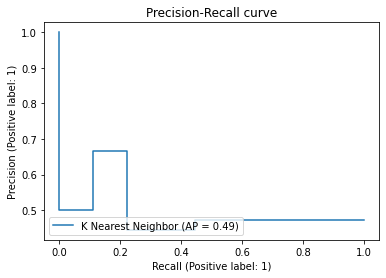

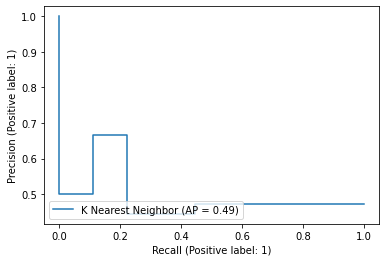

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
display = PrecisionRecallDisplay.from_estimator(cls, X_test, y_test, name='K Nearest Neighbor')
_ = display.ax_.set_title("Precision-Recall curve")
display.plot()

In [ ]:
X = np.load('X.txt.npy')
Y = to_categorical(Y)

classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax')) #Adding the output layer
print(classifier.summary())
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

hist = classifier.fit(X, Y, batch_size=16, epochs=12, verbose=2)
hist = hist.history
acc = hist['accuracy']
cnn_acc = acc[9] * 100
print("CNN Accuracy : "+str(cnn_acc)+"\n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 256)               8

# Best Parameters for MLP

In [ ]:
cls = MLPClassifier()

params = {'activation': ['logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'adaptive'], 'hidden_layer_sizes':[(64,32,16,8),(128,64,32,16,8),(32,16,8)], 'max_iter':[1000,1500,2000]}
clf = GridSearchCV(cls, params)
clf.fit(X_train,y_train)
print("Best parameters for MLP: ",clf.best_params_)

Best parameters for MLP:  {'activation': 'logistic', 'hidden_layer_sizes': (64, 32, 16, 8), 'learning_rate': 'constant', 'max_iter': 2000}


In [ ]:
cls.set_params(**clf.best_params_)

cls.fit(X_train, y_train)
predict = cls.predict(X_test)

[[13  6]
 [ 4  5]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.45      0.56      0.50         9

    accuracy                           0.64        28
   macro avg       0.61      0.62      0.61        28
weighted avg       0.67      0.64      0.65        28



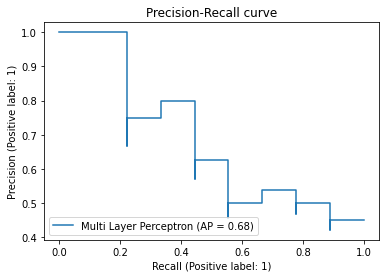

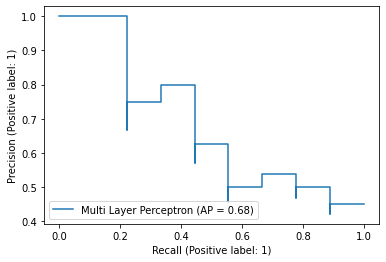

In [ ]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
display = PrecisionRecallDisplay.from_estimator(cls, X_test, y_test, name='Multi Layer Perceptron')
_ = display.ax_.set_title("Precision-Recall curve")
display.plot()